Code to compare Bs inb KTAO agsinst HRApop v1.0 kidney data

## Install and import libraries

In [17]:
%pip install pandas requests seaborn matplotlib

import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Load data

In [18]:
df_expression_reordered = pd.read_csv('data/expression_reordered_final_U (1).csv')
df_expression_reordered = df_expression_reordered[['disease','cell_type','cl_id','gene','ensembl_id']]
df_expression_reordered = df_expression_reordered.rename(
  columns={'ensembl_id':'ensemble'}
)
df_expression_reordered

,disease,cell_type,cl_id,gene,ensemble
0,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,CCL21,ENSG00000137077
1,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,NRXN1,ENSG00000179915
2,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SLC9A3,ENSG00000281861
3,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SLC9A3,ENSG00000281861
4,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SPP1,ENSG00000118785
...,...,...,...,...,...
1237,acute kidney failure,Papillary tips cell,CL:1000597,LCN2,ENSG00000148346
1238,acute kidney failure,Papillary tips cell,CL:1000597,HAVCR1,ENSG00000113249
1239,acute kidney failure,Papillary tips cell,CL:1000597,CST3,ENSG00000101439
1240,acute kidney failure,Papillary tips cell,CL:1000597,CCL2,ENSG00000108691


In [19]:
url = 'https://apps.humanatlas.io/api/grlc/hra/ensembl-lookup.csv'

headers = {
  'Accept' : 'text/csv'
}

# Send the GET request
response = requests.get(url, headers=headers)

# convert text to file-like object
csv_data = StringIO(response.text)

# concert to DataFrame
ensembl_lookup = pd.read_csv(csv_data)
ensembl_lookup

,ensemble,gene_name,hgnc
0,ENSG00000000003,TSPAN6,HGNC:11858
1,ENSG00000000005,TNMD,HGNC:17757
2,ENSG00000000419,DPM1,HGNC:3005
3,ENSG00000000457,SCYL3,HGNC:19285
4,ENSG00000000460,FIRRM,HGNC:25565
...,...,...,...
41201,ENSG00000293312,HNRNPKP3,HGNC:42376
41202,ENSG00000293326,LINC00359,HGNC:42679
41203,ENSG00000293386,LRRC78P,HGNC:54091
41204,ENSG00000293543,DUSP13A,HGNC:56772


In [20]:
df_expression_merged = df_expression_reordered.merge(ensembl_lookup, on='ensemble', how='inner')
df_expression_merged

,disease,cell_type,cl_id,gene,ensemble,gene_name,hgnc
0,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,CCL21,ENSG00000137077,CCL21,HGNC:10620
1,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,NRXN1,ENSG00000179915,NRXN1,HGNC:8008
2,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SPP1,ENSG00000118785,SPP1,HGNC:11255
3,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SERPINE2,ENSG00000135919,SERPINE2,HGNC:8951
4,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,IL18,ENSG00000150782,IL18,HGNC:5986
...,...,...,...,...,...,...,...
1007,acute kidney failure,Papillary tips cell,CL:1000597,LCN2,ENSG00000148346,LCN2,HGNC:6526
1008,acute kidney failure,Papillary tips cell,CL:1000597,HAVCR1,ENSG00000113249,HAVCR1,HGNC:17866
1009,acute kidney failure,Papillary tips cell,CL:1000597,CST3,ENSG00000101439,CST3,HGNC:2475
1010,acute kidney failure,Papillary tips cell,CL:1000597,CCL2,ENSG00000108691,CCL2,HGNC:10618


In [21]:
#for HRApop v1.0
query_string = '''
#+ summary: Cell Summaries with Biomarker information by Dataset
#+ description: Computes the cell summaries plus biomarkers and their mean gene expression for each organ by dataset.

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX ccf: <http://purl.org/ccf/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX UBERON: <http://purl.obolibrary.org/obo/UBERON_>
PREFIX FMA: <http://purl.org/sig/ont/fma/fma>
PREFIX HRA: <https://purl.humanatlas.io/collection/hra-api>
PREFIX HRApop: <https://purl.humanatlas.io/graph/hra-pop>

SELECT DISTINCT ?organ_id ?organ ?dataset ?sex ?tool ?modality ?cell_id ?cell_label ?cell_count ?cell_percentage
  ?biomarker_id ?biomarker_label ?mean_gene_expr_value
FROM HRA:
FROM HRApop:
WHERE {
  {
    ?sample ccf:has_registration_location ?rui_location .
    ?sample ccf:generates_dataset ?dataset .
  } UNION {
    ?block ccf:subdivided_into_sections ?sample .
    ?block ccf:has_registration_location ?rui_location .
    ?sample ccf:generates_dataset ?dataset .
  }

  ?dataset ccf:has_cell_summary [ 
    ccf:cell_annotation_method ?tool ;
    ccf:modality ?modality ;
    ccf:has_cell_summary_row [
      ccf:cell_id ?cell_id ;
      ccf:cell_label ?raw_cell_label ;
      ccf:cell_count ?cell_count ;
      ccf:percentage_of_total ?cell_percentage ;
      ccf:gene_expr [
        ccf:gene_label ?biomarker_label ;
        ccf:gene_id ?biomarker_id ;
        ccf:mean_gene_expr_value ?mean_gene_expr_value ;
      ]
    ]
  ] .

  [] a ccf:SpatialPlacement ;
    ccf:placement_relative_to ?refOrgan ;
    ccf:placement_for ?rui_location .

  ?refOrgan owl:sameAs* [
    ccf:representation_of ?organ_id ;
    ccf:organ_owner_sex ?sex ;
    skos:prefLabel ?organ
  ] .

  ?organ_id rdfs:label ?organ_label .

  OPTIONAL { ?cell_id rdfs:label ?rdfs_cell_label . }
  BIND(COALESCE(?rdfs_cell_label, ?raw_cell_label) as ?cell_label)
}
ORDER BY ?sex ?tool ?dataset DESC(?cell_count)
'''

In [22]:
# define endpoint
url = "https://sparql.humanatlas.io/blazegraph/namespace/kb/sparql"

# define parameters
params = {
    "query": query_string,
}

# set header
headers = {
    "Accept": "text/csv"
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

# convert text to file-like object
csv_data = StringIO(response.text)

# concert to DataFrame
df = pd.read_csv(csv_data)
df.head()

,organ_id,organ,dataset,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,biomarker_id,biomarker_label,mean_gene_expr_value
0,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:12403,TTN,2.725458
1,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:2928,DMD,2.114956
2,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:11068,SLC8A1,1.828498
3,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:7551,MYBPC3,1.461267
4,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:24098,SORBS2,1.654607


In [23]:
# keep only kidney
df_hra_pop_filtered = df[df['organ'].str.contains('kidney')]
df_hra_pop_filtered = df_hra_pop_filtered.rename(columns={
  'biomarker_id':'gene_name'
})
df_hra_pop_filtered

,organ_id,organ,dataset,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,gene_name,biomarker_label,mean_gene_expr_value
2170,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:28685,OCIAD2,1.806449
2171,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:24930,TMEM176A,1.465505
2172,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:6541,LDHB,3.025730
2173,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:843,ATP5MC3,3.073322
2174,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:7061,MGST1,2.340141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131245,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:38043,SEPTIN7P7,0.125000
131246,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:3999,FTL,1.000000
131247,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:29720,MRPL50P2,0.250000
131248,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,ensembl:ENSG00000277662.1,ENSG00000277662.1,0.166666


In [24]:
df_hra_pop_filtered = df_hra_pop_filtered.rename(columns={
  'gene_name':'hgnc_id'
})

In [25]:
df_expression_merged = df_expression_merged.rename(columns={
    'hgnc': 'hgnc_id'
})

In [26]:
df_hra_pop_filtered.head()

,organ_id,organ,dataset,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,hgnc_id,biomarker_label,mean_gene_expr_value
2170,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:28685,OCIAD2,1.806449
2171,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:24930,TMEM176A,1.465505
2172,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:6541,LDHB,3.025730
2173,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:843,ATP5MC3,3.073322
2174,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:7061,MGST1,2.340141


In [27]:
df_expression_merged.head()

,disease,cell_type,cl_id,gene,ensemble,gene_name,hgnc_id
0,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,CCL21,ENSG00000137077,CCL21,HGNC:10620
1,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,NRXN1,ENSG00000179915,NRXN1,HGNC:8008
2,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SPP1,ENSG00000118785,SPP1,HGNC:11255
3,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,SERPINE2,ENSG00000135919,SERPINE2,HGNC:8951
4,chronic kidney disease,Proximal tubule epithelial cell,CL:0002306,IL18,ENSG00000150782,IL18,HGNC:5986


## Check for matches between KTAO and HRApop v1.0

In [28]:
df_merged = pd.merge(df_hra_pop_filtered, df_expression_merged, on=[
                     "hgnc_id"], how="inner")
df_merged = df_merged[['dataset', 'sex', 'tool','organ','cell_id','cell_label','biomarker_label','disease',
                       'hgnc_id', 'mean_gene_expr_value']].drop_duplicates()
df_merged

,dataset,sex,tool,organ,cell_id,cell_label,biomarker_label,disease,hgnc_id,mean_gene_expr_value
0,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,Left kidney,http://purl.obolibrary.org/obo/CL_0002201,renal beta-intercalated cell,S100A6,chronic kidney disease,HGNC:10496,3.694490
23,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,Left kidney,http://purl.obolibrary.org/obo/CL_0002201,renal beta-intercalated cell,S100A6,acute kidney failure,HGNC:10496,3.694490
46,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,Left kidney,http://purl.obolibrary.org/obo/CL_4030016,epithelial cell of early distal convoluted tubule,SPP1,chronic kidney disease,HGNC:11255,0.148600
69,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,Left kidney,http://purl.obolibrary.org/obo/CL_4030016,epithelial cell of early distal convoluted tubule,SPP1,acute kidney failure,HGNC:11255,0.148600
92,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,Right kidney,http://purl.obolibrary.org/obo/CL_1000597,papillary tips cell,S100A6,chronic kidney disease,HGNC:10496,8.969618
...,...,...,...,...,...,...,...,...,...,...
15755,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,Right kidney,http://purl.obolibrary.org/obo/CL_1000692,kidney interstitial fibroblast,IGFBP7,acute kidney failure,HGNC:5476,0.454918
15778,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,Right kidney,http://purl.obolibrary.org/obo/CL_4030018,kidney connecting tubule principal cell,IGFBP7,chronic kidney disease,HGNC:5476,0.769231
15801,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,Right kidney,http://purl.obolibrary.org/obo/CL_4030018,kidney connecting tubule principal cell,IGFBP7,acute kidney failure,HGNC:5476,0.769231
15824,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,Right kidney,http://purl.obolibrary.org/obo/CL_4030017,epithelial cell of late distal convoluted tubule,IGFBP7,chronic kidney disease,HGNC:5476,0.814286


## Visualize

### Heatmap

In [29]:
# Aggregate to ensure uniqueness
df_agg = df_merged.groupby(["biomarker_label", "dataset"])[
    "mean_gene_expr_value"].mean().reset_index()

<Figure size 4000x1000 with 0 Axes>

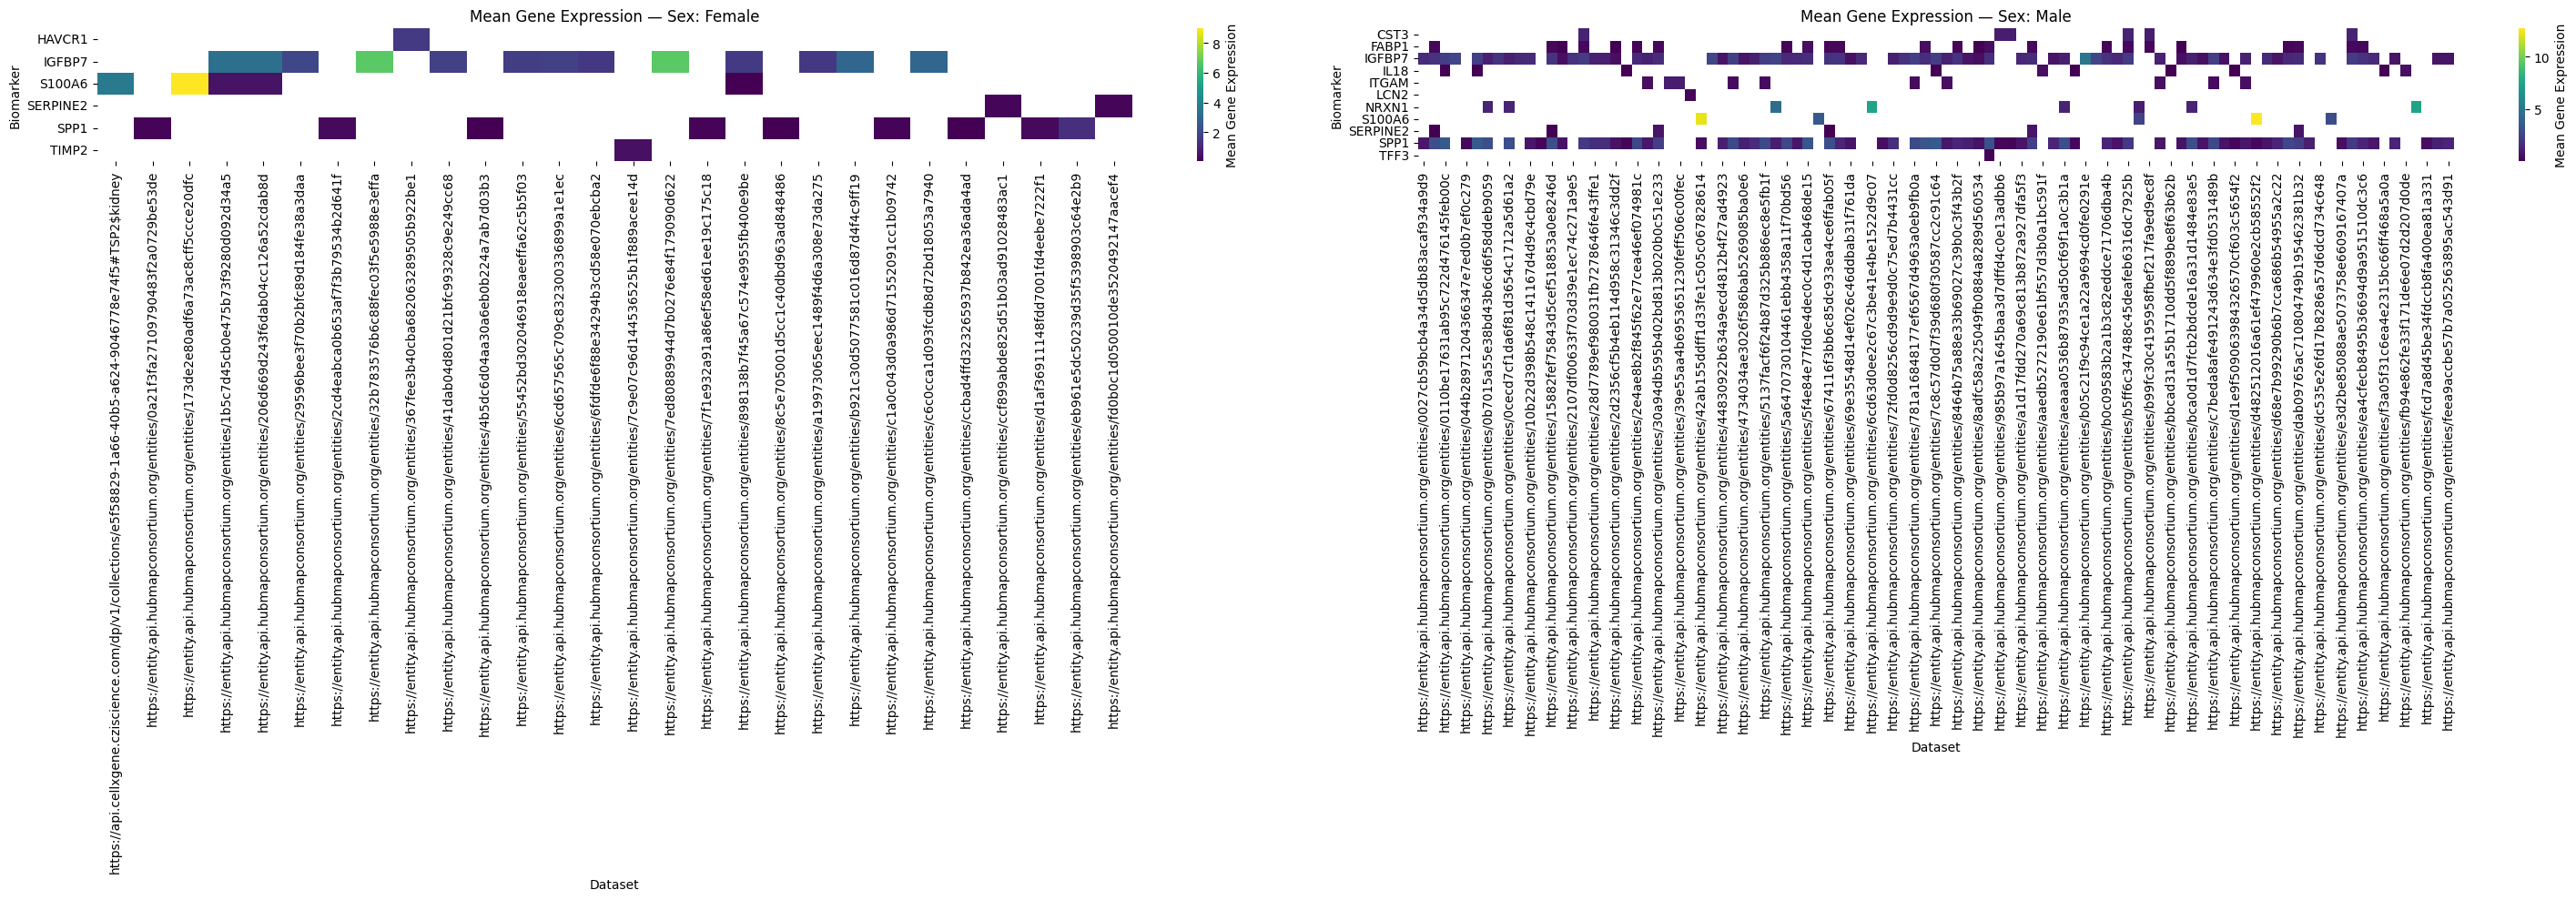

In [30]:


plt.figure(figsize=(40, 10))

# Aggregate by biomarker, dataset, and sex
df_agg = (
    df_merged.groupby(["sex", "biomarker_label", "dataset"])["mean_gene_expr_value"]
      .mean()
      .reset_index()
)

# Get unique sexes
sexes = df_agg["sex"].unique()

# Create subplots: one per sex
fig, axes = plt.subplots(1, len(sexes), figsize=(
    15 * len(sexes), 10), squeeze=False)

for ax, sex in zip(axes[0], sexes):
    # Pivot for this sex
    heatmap_data = df_agg.query("sex == @sex").pivot(
        index="biomarker_label",
        columns="dataset",
        values="mean_gene_expr_value"
    )

    # Plot heatmap
    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        # annot=True,
        annot=False,
        fmt=".2f",
        cbar_kws={'label': 'Mean Gene Expression'},
        ax=ax
    )

    # Rotate cell annotations
    for text in ax.texts:
        text.set_rotation(90)
        
    # Prevent y tick labels from rotating
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    ax.set_title(f"Mean Gene Expression — Sex: {sex}")
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Biomarker")

plt.tight_layout()
plt.show()

### Faceted scatter graph

/Users/abueckle/Documents/GitHub/hra-hackathon-data/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  self._figure.tight_layout(*args, **kwargs)
/var/folders/x7/ttglg94d4g500ypbdkw3__nw0000gq/T/ipykernel_80777/3854015216.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/x7/ttglg94d4g500ypbdkw3__nw0000gq/T/ipykernel_80777/3854015216.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Figure size 4000x1000 with 0 Axes>

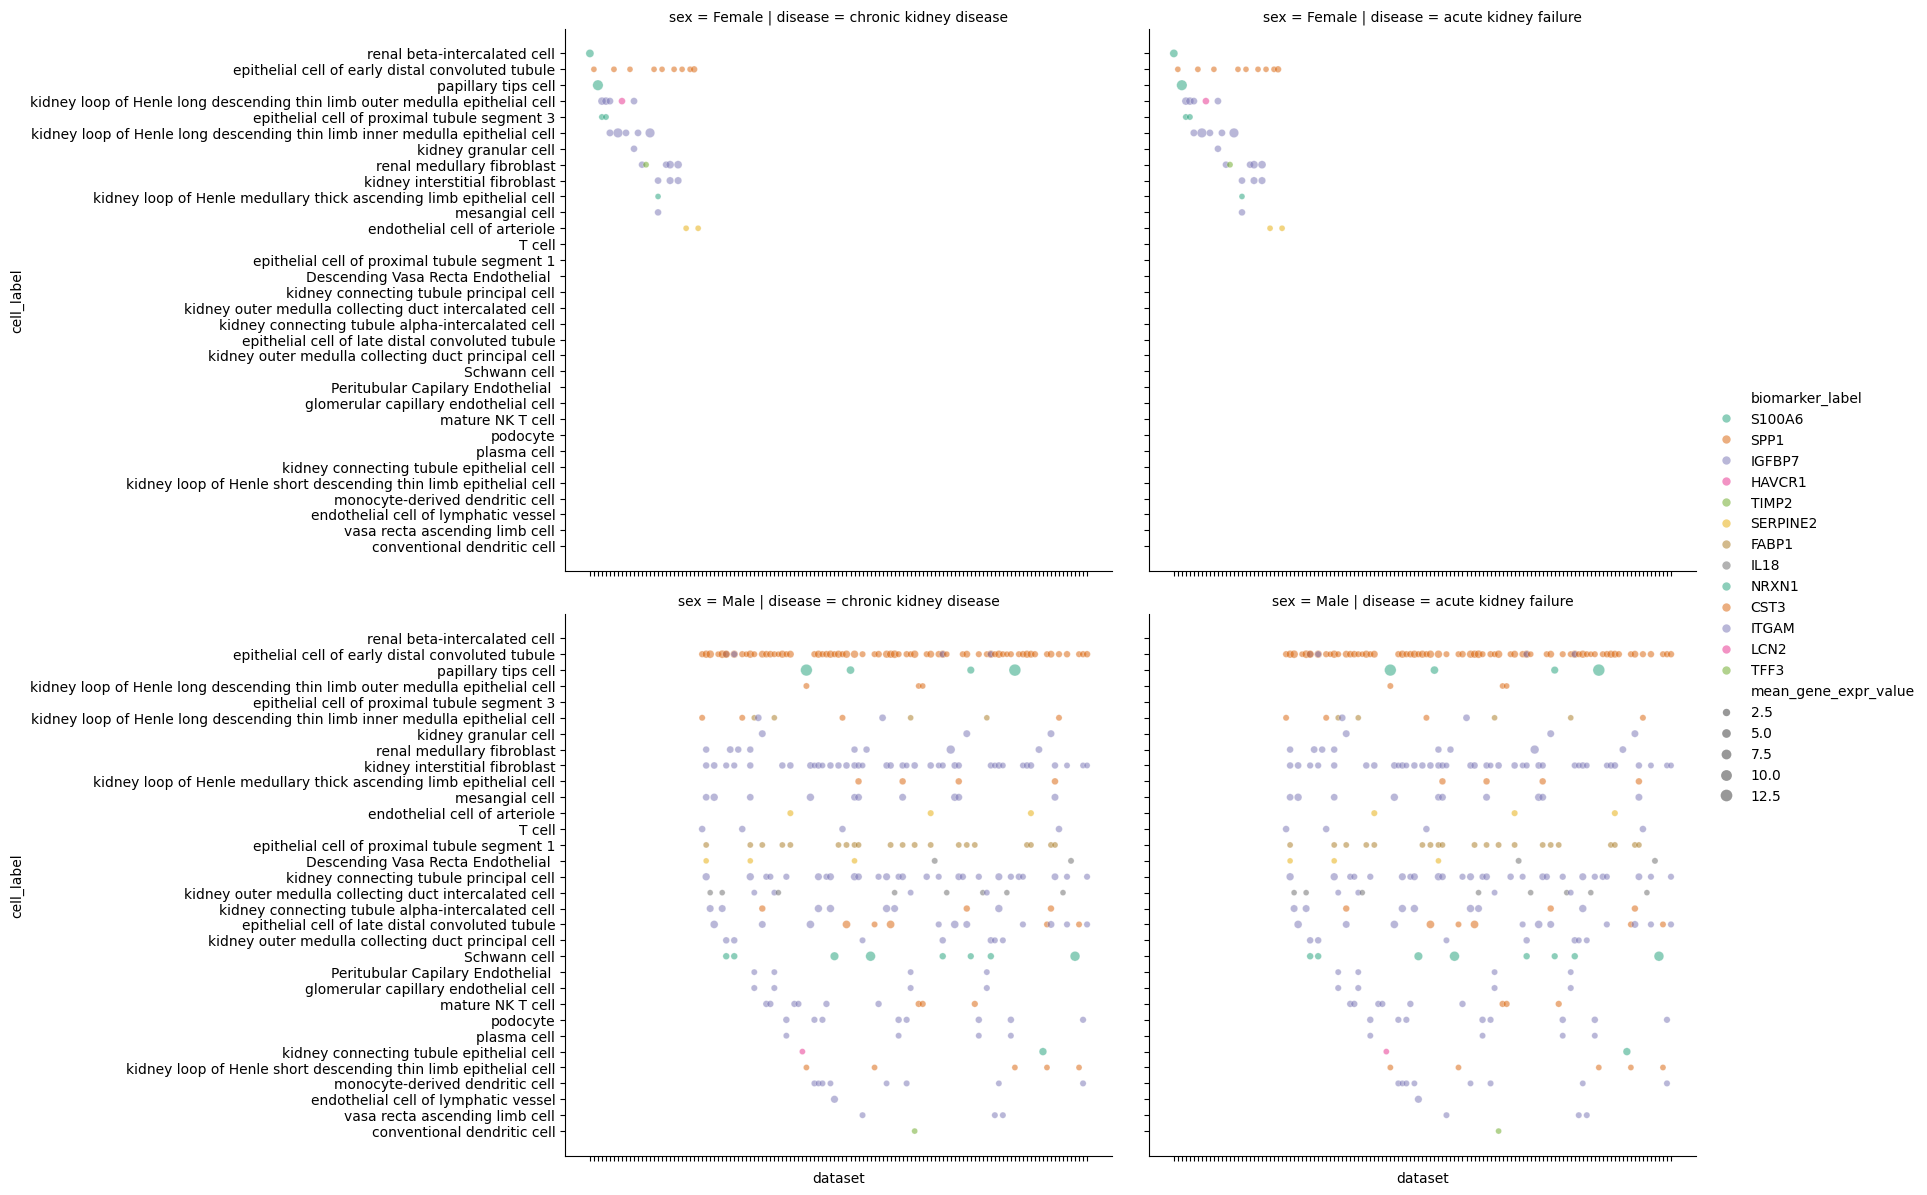

In [31]:
plt.figure(figsize=(40, 10))

# Facet scatter plot by disease
g = sns.relplot(
    data=df_merged,
    x="dataset",
    y="cell_label",
    size="mean_gene_expr_value",
    row='sex',
    col="disease",        # facet by disease
    hue='biomarker_label',
    kind="scatter",
    height=6,             # row height
    aspect=1,              # width/height ratio
    palette="Dark2",
    alpha=0.5
)

# Rotate x-axis labels in all facets
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()